# How have the costs of staying at an AirBNB in Boston and Seattle changed over time?

In [1]:
#import libraries
import pandas as pd 
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

### Read in csv files from the airbnb data sets

In [2]:
#read in boston data
boston_calender = pd.read_csv('BostonData/calendar.csv')
#read in seattle
seattle_calender = pd.read_csv('SeattleData/calendar.csv')


### Take a look at all of the dataframes

In [3]:
boston_calender.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
seattle_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Process date and time data into one data frame for analysis

In [5]:
#create new dataframes just consisting of date and prices of seattle and washington
#concat dates and prices of seattle and boston into one dataframe
boston_dates_prices = boston_calender[["date","price"]]
seattle_dates_prices = seattle_calender[["date","price"]]
#rename price column names

combined_dates_prices = pd.concat([boston_dates_prices,seattle_dates_prices],axis= 0,sort = True)

#drop the na values from the data frame
combined_dates_prices.dropna(axis=0,inplace=True)

#remove dollar signs and commas from price
combined_dates_prices.price = combined_dates_prices.price.replace({"\$":'',",":''},regex= True)
#convert prices from object to float type
combined_dates_prices.price = combined_dates_prices.price.astype('float')

#convert dates into datetime64 data type
combined_dates_prices.date = combined_dates_prices.date.astype('datetime64')
combined_dates_prices.head()

,date,price
365,2017-08-22,65.0
366,2017-08-21,65.0
367,2017-08-20,65.0
368,2017-08-19,75.0
369,2017-08-18,75.0


### Visualize the data

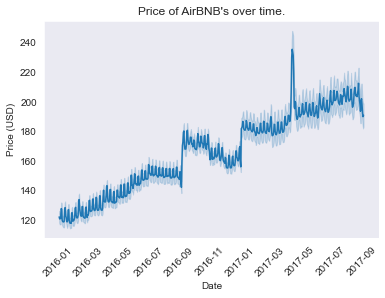

In [6]:

sns.set_style("dark")
plot = sns.lineplot(data = combined_dates_prices, x = "date" , y = "price")
plot.set_title("Price of AirBNB's over time.")
plot.set_ylabel("Price (USD)")
plot.set_xlabel("Date")
plot.tick_params(axis = 'x', labelsize = 10, rotation = 45)



### Check for correlation

In [7]:
#create a new data frame by adding years and months (months is divided by 12 so it is converted) of dates
combined_dates_prices["month_year"] = (combined_dates_prices.date.dt.month /12) + combined_dates_prices.date.dt.year
#check correlation between price and date using pearson method
combined_dates_prices.price.corr(combined_dates_prices.month_year)

0.15898296958698396

### Create a linear regression model to see the approximate rate of change

In [8]:
#instantiate the model
model = linear_model.LinearRegression()
model.fit(combined_dates_prices["month_year"].to_numpy().reshape(-1,1),combined_dates_prices["price"])
#print out the slope
model.coef_

array([52.36632683])

# Conclusions
From the the graph, it is clear that AirBNB prices has increased over time, and the Pearson correlation coefficient of 0.159 indiciates a postive correleation between the two factors. Lastly, the linear regression model shows a slope of 52.37 USD / year, showing that AirBNB prices are rising by quite a significant amount per year in Boston and Seattle.